In [ ]:
#Importing all necessary directories.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import datetime

In [ ]:
#Importing Dataset of past 5 years of AMAZON's stock info.
from google.colab import files
uploaded=files.upload()

In [ ]:
df=pd.read_csv('AMAZON_STOCK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,21/09/15,544.330017,549.780029,539.590027,548.390015,548.390015,3283300
1,22/09/15,539.710022,543.549988,532.659973,538.400024,538.400024,3841700
2,23/09/15,538.299988,541.210022,534.000000,536.070007,536.070007,2237600
3,24/09/15,530.549988,534.559998,522.869995,533.750000,533.750000,3501000
4,25/09/15,542.570007,542.799988,521.400024,524.250000,524.250000,4031000
...,...,...,...,...,...,...,...
1313,07/12/20,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300
1314,08/12/20,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
1315,09/12/20,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
1316,10/12/20,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200


In [ ]:
#predict stock prices, n days into future
n=30 #the next two weeks
# forecast_days=n
# plot_days = []
# for i in range(n):
#     plot_days.append(i)
plot_days=np.array(df['Date'])
plot_days=plot_days[-forecast_days:]
plot_days
 

array(['30/10/20', '02/11/20', '03/11/20', '04/11/20', '05/11/20',
       '06/11/20', '09/11/20', '10/11/20', '11/11/20', '12/11/20',
       '13/11/20', '16/11/20', '17/11/20', '18/11/20', '19/11/20',
       '20/11/20', '23/11/20', '24/11/20', '25/11/20', '27/11/20',
       '30/11/20', '01/12/20', '02/12/20', '03/12/20', '04/12/20',
       '07/12/20', '08/12/20', '09/12/20', '10/12/20', '11/12/20'],
      dtype=object)

In [ ]:
dataset_days=1318
dataset_days = []
for i in range(1318):
    dataset_days.append(i)

In [ ]:
#Adjusted Close Price
df=df[['Adj Close']]
df

,Adj Close
0,548.390015
1,538.400024
2,536.070007
3,533.750000
4,524.250000
...,...
1313,3158.000000
1314,3177.290039
1315,3104.199951
1316,3101.489990


In [ ]:
#Create another column shifting data in the original dataset to n days up
#This column gives prediction of stock in n days
df['Forecast']=df[['Adj Close']].shift(-forecast_days)
df
#print(df.tail())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj Close,Forecast
0,548.390015,628.349976
1,538.400024,625.309998
2,536.070007,640.950012
3,533.750000,655.650024
4,524.250000,659.369995
...,...,...
1313,3158.000000,NaN
1314,3177.290039,NaN
1315,3104.199951,NaN
1316,3101.489990,NaN


In [ ]:
#Create the independent dataset Y of close prices
dataset_adj_close=np.array(df[['Adj Close']])
X=dataset_adj_close[:-forecast_days] 
print(X)


[[ 548.390015]
 [ 538.400024]
 [ 536.070007]
 ...
 [3286.330078]
 [3162.780029]
 [3211.01001 ]]


In [ ]:
#Create the dependent dataset Y of forecast prices
Y=np.array(df['Forecast'])
print(Y)
Y=Y[: -forecast_days] 
print(Y)


[628.349976 625.309998 640.950012 ...        nan        nan        nan]
[ 628.349976  625.309998  640.950012 ... 3104.199951 3101.48999
 3116.419922]


In [ ]:
#Split data for testing and training
x_train, x_test, y_train,y_test= train_test_split(X,Y,test_size=0.2)


In [ ]:
#Create and Train the SVM rbf Model
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.01) 
svr_rbf.fit(x_train,y_train)

svm_accuracy=svr_rbf.score(x_test,y_test)
print(svm_accuracy)

0.8598895592155382


In [ ]:
#Create and Train SV Linear Regression Model
lr=LinearRegression()
lr.fit(x_train,y_train)

lr_accuracy=lr.score(x_test,y_test)
print(lr_accuracy)


0.9426854172395169


In [ ]:
#Forecasting
x_forecast=np.array(df.drop(['Forecast'],1))[-forecast_days:]
x_forecast

array([[3036.149902],
       [3004.47998 ],
       [3048.409912],
       [3241.159912],
       [3322.      ],
       [3311.370117],
       [3143.73999 ],
       [3035.02002 ],
       [3137.389893],
       [3110.280029],
       [3128.810059],
       [3131.060059],
       [3135.659912],
       [3105.459961],
       [3117.02002 ],
       [3099.399902],
       [3098.389893],
       [3118.060059],
       [3185.070068],
       [3195.340088],
       [3168.040039],
       [3220.080078],
       [3203.530029],
       [3186.72998 ],
       [3162.580078],
       [3158.      ],
       [3177.290039],
       [3104.199951],
       [3101.48999 ],
       [3116.419922]])

In [ ]:
svr_forecast=svr_rbf.predict(x_forecast)
svr_forecast
lr_forecast=lr.predict(x_forecast)
lr_forecast

array([3126.15786532, 3093.89417418, 3138.64773429, 3335.01154182,
       3417.36727454, 3406.53809529, 3235.76512515, 3125.00679953,
       3229.29597223, 3201.67783414, 3220.55527769, 3222.84746222,
       3227.53355638, 3196.76739624, 3208.54419106, 3190.59371915,
       3189.56477382, 3209.60372941, 3277.87008744, 3288.33265673,
       3260.52076793, 3313.53648882, 3296.67614829, 3279.5611206 ,
       3254.95843988, 3250.29249148, 3269.94419319, 3195.48376272,
       3192.72299354, 3207.93284202])

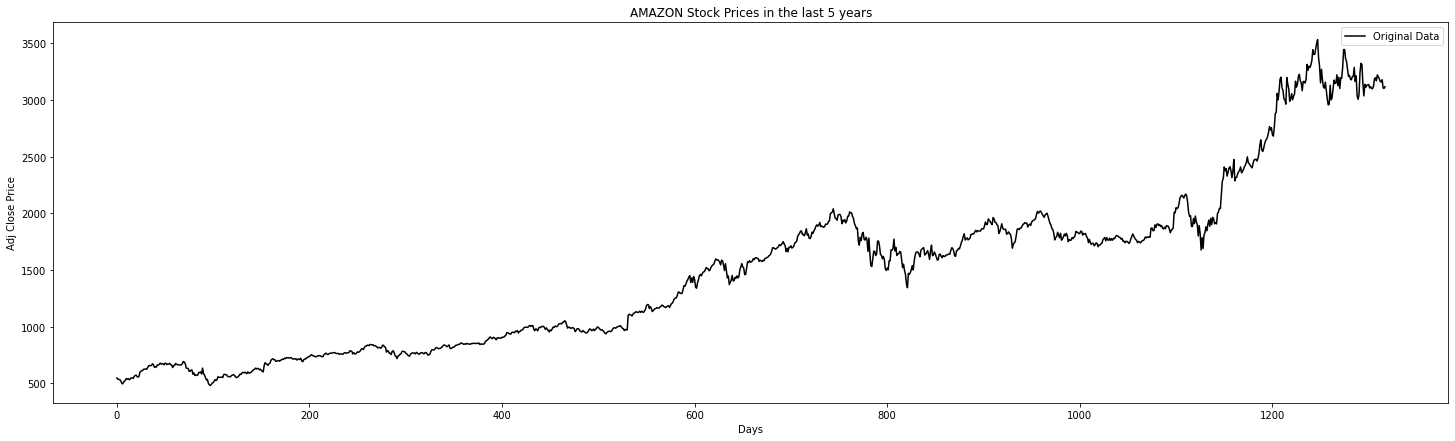

In [ ]:
plt.figure(figsize=(25,7))
plt.plot(dataset_days, dataset_adj_close, color = 'black', label='Original Data')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('AMAZON Stock Prices in the last 5 years')
plt.legend()
plt.show()

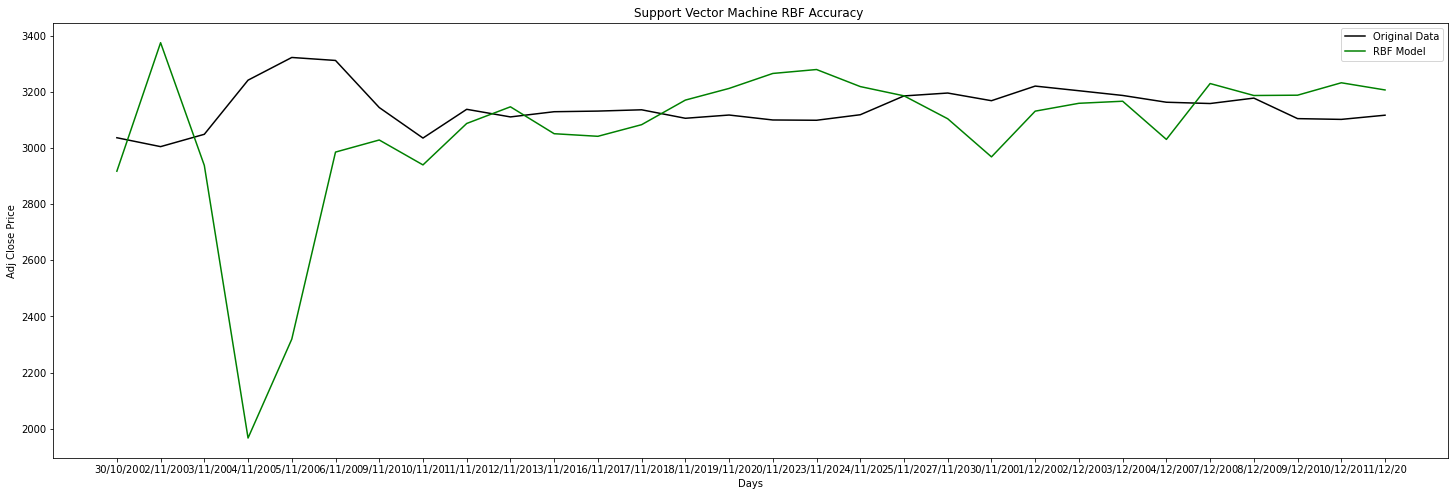

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(plot_days, x_forecast, color = 'black', label='Original Data')
plt.plot(plot_days, svr_forecast, color = 'green', label='RBF Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Machine RBF Accuracy ')
plt.legend()
plt.show()

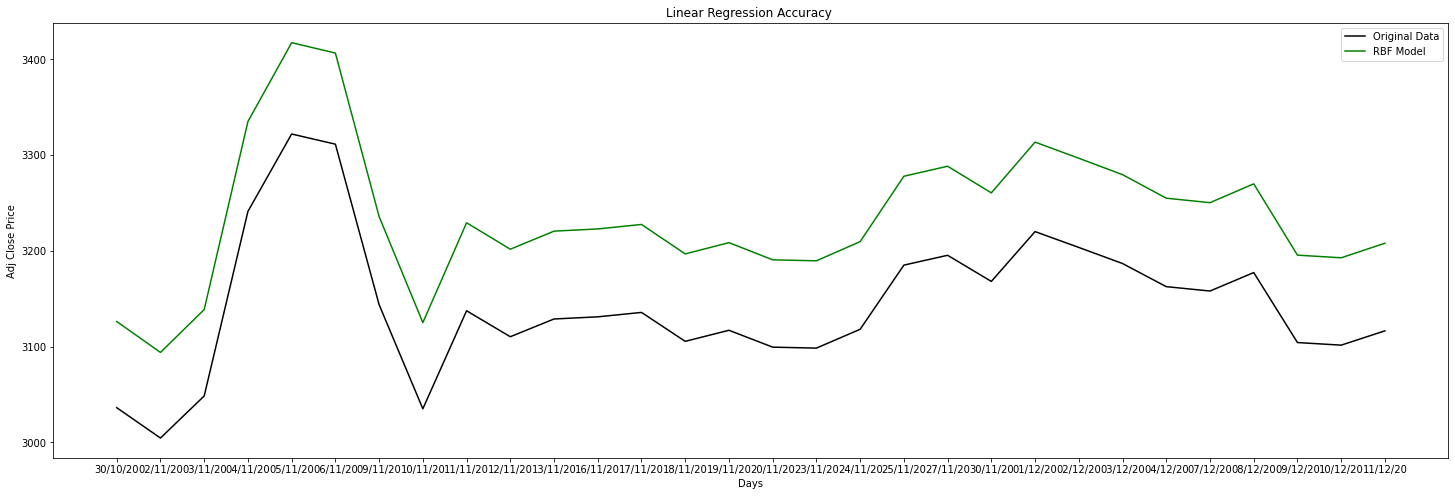

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(plot_days, x_forecast, color = 'black', label='Original Data')
plt.plot(plot_days, lr_forecast, color = 'green', label='RBF Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Linear Regression Accuracy ')
plt.legend()
plt.show()